In [6]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split


In [7]:
digits = load_digits()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.2, random_state=42
)

In [9]:
# lets use grid search to find the best hyperparameters for different models
models = {
    "SVM": svm.SVC(),
    "RandomForest": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "DecisionTree": DecisionTreeClassifier(),
    "GaussianNB": GaussianNB(),
    "KNeighbors": KNeighborsClassifier(),
}
params = {
    "SVM": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]},
    "RandomForest": {"n_estimators": [10, 50, 100], "max_depth": [None, 10, 20]},
    "LogisticRegression": {"C": [0.1, 1, 10], "solver": ["liblinear", "lbfgs"]},
    "DecisionTree": {"max_depth": [None, 10, 20], "min_samples_split": [2, 5, 10]},
    "GaussianNB": {},
    "KNeighbors": {"n_neighbors": [3, 5, 7], "weights": ["uniform", "distance"]},
}
from sklearn.model_selection import GridSearchCV
best_models = {}
for model_name in models:
    clf = GridSearchCV(models[model_name], params[model_name], cv=5)
    clf.fit(X_train, y_train)
    best_models[model_name] = clf.best_estimator_
print("Best models after hyperparameter tuning:")
for model_name in best_models:
    print(f"{model_name}: {best_models[model_name]}")
# Evaluate the best models on the test set
from sklearn.metrics import accuracy_score
for model_name in best_models:
    y_pred = best_models[model_name].predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Test Accuracy: {accuracy:.4f}")



Best models after hyperparameter tuning:
SVM: SVC(C=10)
RandomForest: RandomForestClassifier(max_depth=20)
LogisticRegression: LogisticRegression(C=0.1, max_iter=1000)
DecisionTree: DecisionTreeClassifier()
GaussianNB: GaussianNB()
KNeighbors: KNeighborsClassifier(n_neighbors=3, weights='distance')
SVM Test Accuracy: 0.9861
RandomForest Test Accuracy: 0.9667
LogisticRegression Test Accuracy: 0.9722
DecisionTree Test Accuracy: 0.8528
GaussianNB Test Accuracy: 0.8472
KNeighbors Test Accuracy: 0.9833


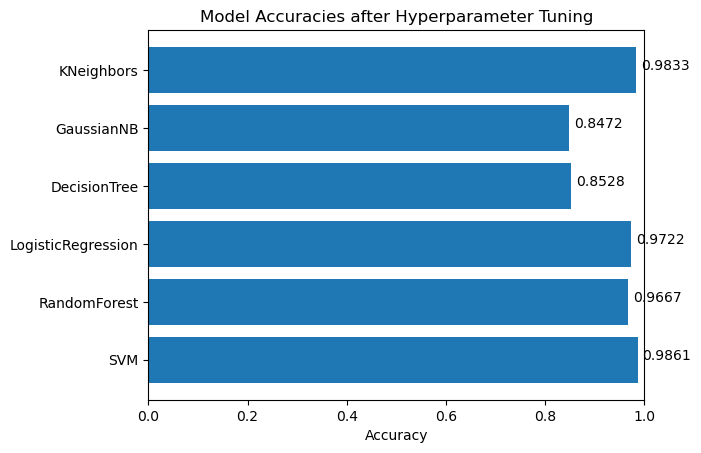

In [13]:
# lets plot the results
import matplotlib.pyplot as plt
model_names = list(best_models.keys())
accuracies = []
for model_name in best_models:
    y_pred = best_models[model_name].predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
plt.barh(model_names, accuracies)
plt.xlabel("Accuracy")
plt.title("Model Accuracies after Hyperparameter Tuning")
plt.xlim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(v + 0.01, i, f"{v:.4f}")
plt.show()